In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt

读取处理好的数据

In [2]:
data=np.load('save_data.npy')
valence_labels=np.load('save_valence_labels.npy')
arousal_labels=np.load('save_arousal_labels.npy')

将数据集划分为训练数据和测试数据

In [3]:
def split(data,labels,rate=0.8):
#     data = np.concatenate(data,axis=0)
#     labels = np.concatenate(labels,axis=0)
#     print(data.shape)
#     print(labels.shape)
    np.random.seed(999)
    index = np.arange(labels.shape[0])
    index_random = index
    
    np.random.shuffle(index_random)
    data = data[index_random]
    labels = labels[index_random]
    
    test_data = data[int(data.shape[0]*rate):]
    test_labels = labels[int(data.shape[0]*rate):]
    
    train_data = data[:int(data.shape[0]*rate)]
    train_labels = labels[:int(data.shape[0]*rate)]
#     print(train_data.shape)
    return train_data,train_labels,test_data,test_labels

In [4]:
# train_data,train_labels,test_data,test_labels=split(data,arousal_labels,0.8)
# print(train_data.shape)
# print(train_labels.shape)
# print(test_data.shape)
# print(test_labels.shape)

In [5]:
def gaussian(dist, a=5, b=0, c=10):
    return a * np.exp((-(dist - b) ** 2 / (2 * c ** 2))) 

In [6]:
def inverse_dis(dist,const=10):
    return 1/(dist+const)

In [7]:
def classify0(inX, dataSet, labels, k_num):
    dataSetSize = dataSet.shape[0]
#     tempdata = np.concatenate(dataSet,axis=0)
#     print(dataSet.shape[0])
    #测试数据二维特征相减后平方再按行相加最后开根号
    diffMat = np.tile(inX, (dataSetSize, 1, 1)) - dataSet
#     print(diffMat.shape)
    diffMat = diffMat.reshape(-1,40*101)
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
#     print(sortedDistIndices)
    #开一个字典存放测试数据到各类别的数量
    Count = {}
    for i in range(k_num):
        Nearlabel = labels[sortedDistIndices[i]]
#         weight = gaussian(distances[sortedDistIndices[i]])
        weight = inverse_dis(distances[sortedDistIndices[i]])
        #计算类别次数
        Count[Nearlabel] = Count.get(Nearlabel,0) + 1*weight
    sortedClassCount = sorted(Count.items(),key=operator.itemgetter(1),reverse=True)
#     print(Count.items())
    return sortedClassCount[0][0]

使用k-fold交叉验证得到平均error

In [8]:
def EEGClassTest(data,labels,k_num=6):
    
    
    data = np.concatenate(data,axis=0)
    labels = np.concatenate(labels,axis=0)
    all = 0.0
    for j in range(10):
        #计算错误个数
        errorCount = 0.0
        train_data,train_labels,test_data,test_labels=split(data,labels,0.8)
#         print(train_data.shape)
#         print(test_data[0].shape)

        for i in range(test_data.shape[0]):
            result = classify0(test_data[i],train_data,train_labels,k_num)
#             print("分类返回结果为%d\t真实结果为%d" % (result, test_labels[i]))
            if(result!=test_labels[i]):
                errorCount += 1.0
#         print("测试数据：%d" %(test_data.shape[0]))
#         print("第%d折总共错: %d\n错误率: %f%%" % (j+1,errorCount, 100*errorCount/test_data.shape[0]))
        labels[:test_labels.shape[0]]=test_labels
        labels[test_labels.shape[0]:]=train_labels
        data[:test_data.shape[0]]=test_data
        data[test_data.shape[0]:]=train_data
        all= all+errorCount 
    print("平均错误率：%f%%" %(100*all/(10*test_data.shape[0])))
    return 100*all/(10*test_data.shape[0])

寻找最优超参数k

In [11]:
def findBestK(data,labels):
    minKErr=[]
    bestk=1000
    for i in range(3):
        print("k_num为%d时"%(i+2))
        if(bestk>EEGClassTest(data,arousal_labels,i+2)):
            bestk=i+2
        minKErr.append(EEGClassTest(data,arousal_labels,i+2))

    # print(minKErr)
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.set(xlabel='k_num',ylabel='error',title="valence_labels error")
    ax.plot(minKErr)
    print("最佳的k_num: %d" %(bestk))
    return bestk

In [ ]:
findBestK(data,valence_labels)

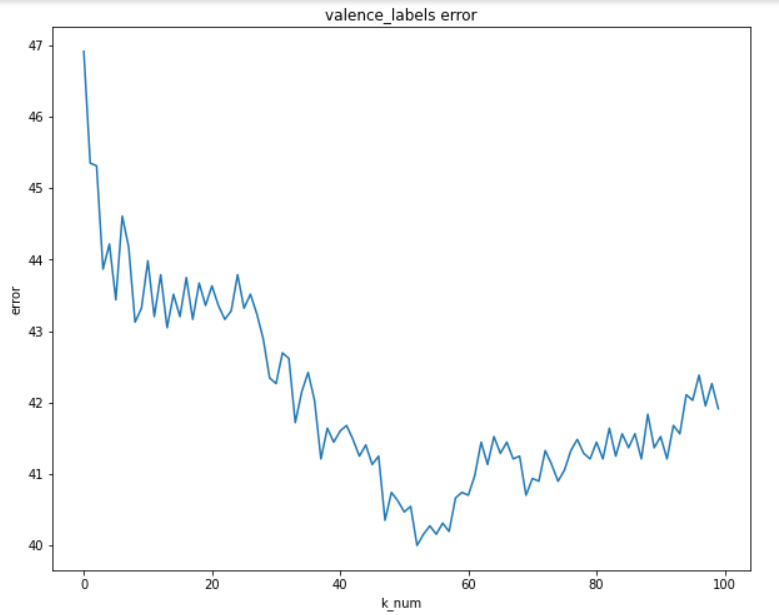

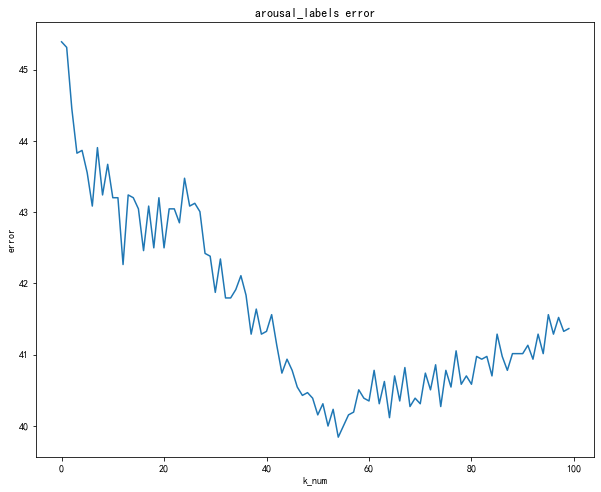

In [13]:
a2 = np.array([45.390625, 45.3125, 44.453125, 43.828125, 43.8671875, 43.5546875, 43.0859375, 43.90625, 43.2421875, 43.671875, 43.203125, 43.203125, 42.265625, 43.2421875, 43.203125, 43.046875, 42.4609375, 43.0859375, 42.5, 43.203125, 42.5, 43.046875, 43.046875, 42.8515625, 43.4765625, 43.0859375, 43.125, 43.0078125, 42.421875, 42.3828125, 41.875, 42.34375, 41.796875, 41.796875, 41.9140625, 42.109375, 41.8359375, 41.2890625, 41.640625, 41.2890625, 41.328125, 41.5625, 41.1328125, 40.7421875, 40.9375, 40.78125, 40.546875, 40.4296875, 40.46875, 40.390625, 40.15625, 40.3125, 40.0, 40.234375, 39.84375, 40.0, 40.15625, 40.1953125, 40.5078125, 40.390625, 40.3515625, 40.78125, 40.3125, 40.625, 40.1171875, 40.703125, 40.3515625, 40.8203125, 40.2734375, 40.390625, 40.3125, 40.7421875, 40.5078125, 40.859375, 40.2734375, 40.78125, 40.546875, 41.0546875, 40.5859375, 40.703125, 40.5859375, 40.9765625, 40.9375, 40.9765625, 40.703125, 41.2890625, 40.9765625, 40.78125, 41.015625, 41.015625, 41.015625, 41.1328125, 40.9375, 41.2890625, 41.015625, 41.5625, 41.2890625, 41.5234375, 41.328125, 41.3671875])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set(xlabel='k_num',ylabel='error',title="arousal_labels error")
ax.plot(a2)